# 1. Data Preprocessing
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

sns.set()

## Data preprocessing
### We use books.csv and ratings.csv for our model

 Data preprocessing
### We use books.csv and ratings.csv for our model

In [2]:
books = pd.read_csv ('C:/Users/kl/Desktop/Novel Recommender/books.csv')
ratings = pd.read_csv ('C:/Users/kl/Desktop/Novel Recommender/ratings.csv')

In [3]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

### We don't need all the features for recommendation, so we take only the relevant features only.

In [4]:
columns = ['id', 'book_id', 'isbn', 'authors', 'original_publication_year', 'title', 'average_rating',
           'ratings_count', 'small_image_url']

books_new = books[columns]

books_new.head()

,id,book_id,isbn,authors,original_publication_year,title,average_rating,ratings_count,small_image_url
0,1,2767052,439023483,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603s...
1,2,3,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,https://images.gr-assets.com/books/1474154022s...
2,3,41865,316015849,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,3866839,https://images.gr-assets.com/books/1361039443s...
3,4,2657,61120081,Harper Lee,1960.0,To Kill a Mockingbird,4.25,3198671,https://images.gr-assets.com/books/1361975680s...
4,5,4671,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,2683664,https://images.gr-assets.com/books/1490528560s...


In [5]:
books_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   isbn                       9300 non-null   object 
 3   authors                    10000 non-null  object 
 4   original_publication_year  9979 non-null   float64
 5   title                      10000 non-null  object 
 6   average_rating             10000 non-null  float64
 7   ratings_count              10000 non-null  int64  
 8   small_image_url            10000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 703.3+ KB


### Check null values for books

In [7]:
books_new.isna().sum()

id                             0
book_id                        0
isbn                         700
authors                        0
original_publication_year     21
title                          0
average_rating                 0
ratings_count                  0
small_image_url                0
dtype: int64

### Null values detected. fill the empty data points with 'NA'

In [8]:
books_new = books_new.fillna('NA')
books_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   isbn                       10000 non-null  object 
 3   authors                    10000 non-null  object 
 4   original_publication_year  10000 non-null  object 
 5   title                      10000 non-null  object 
 6   average_rating             10000 non-null  float64
 7   ratings_count              10000 non-null  int64  
 8   small_image_url            10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.3+ KB


### Ratings

In [9]:
ratings.isna().sum()

book_id    0
user_id    0
rating     0
dtype: int64

### No null values

In [10]:
books_new.to_csv('books_cleaned.csv')

# 2. Exploratory Data Analysis
## Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Data Collection

In [15]:
books = pd.read_csv('C:/Users/kl/Desktop/Novel Recommender/books.csv')
ratings = pd.read_csv('C:/Users/kl/Desktop/Novel Recommender/ratings.csv')
tags = pd.read_csv('C:/Users/kl/Desktop/Novel Recommender/tags.csv')
book_tags = pd.read_csv('C:/Users/kl/Desktop/Novel Recommender/book_tags.csv')

In [16]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [17]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


## Data Description

In [18]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [19]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [20]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [21]:
ratings.describe

<bound method NDFrame.describe of         book_id  user_id  rating
0             1      314       5
1             1      439       3
2             1      588       5
3             1     1169       4
4             1     1185       4
...         ...      ...     ...
981751    10000    48386       5
981752    10000    49007       4
981753    10000    49383       5
981754    10000    50124       5
981755    10000    51328       1

[981756 rows x 3 columns]>

## Exploratory Data Analysis
### Checking the top rated books 📖

[]

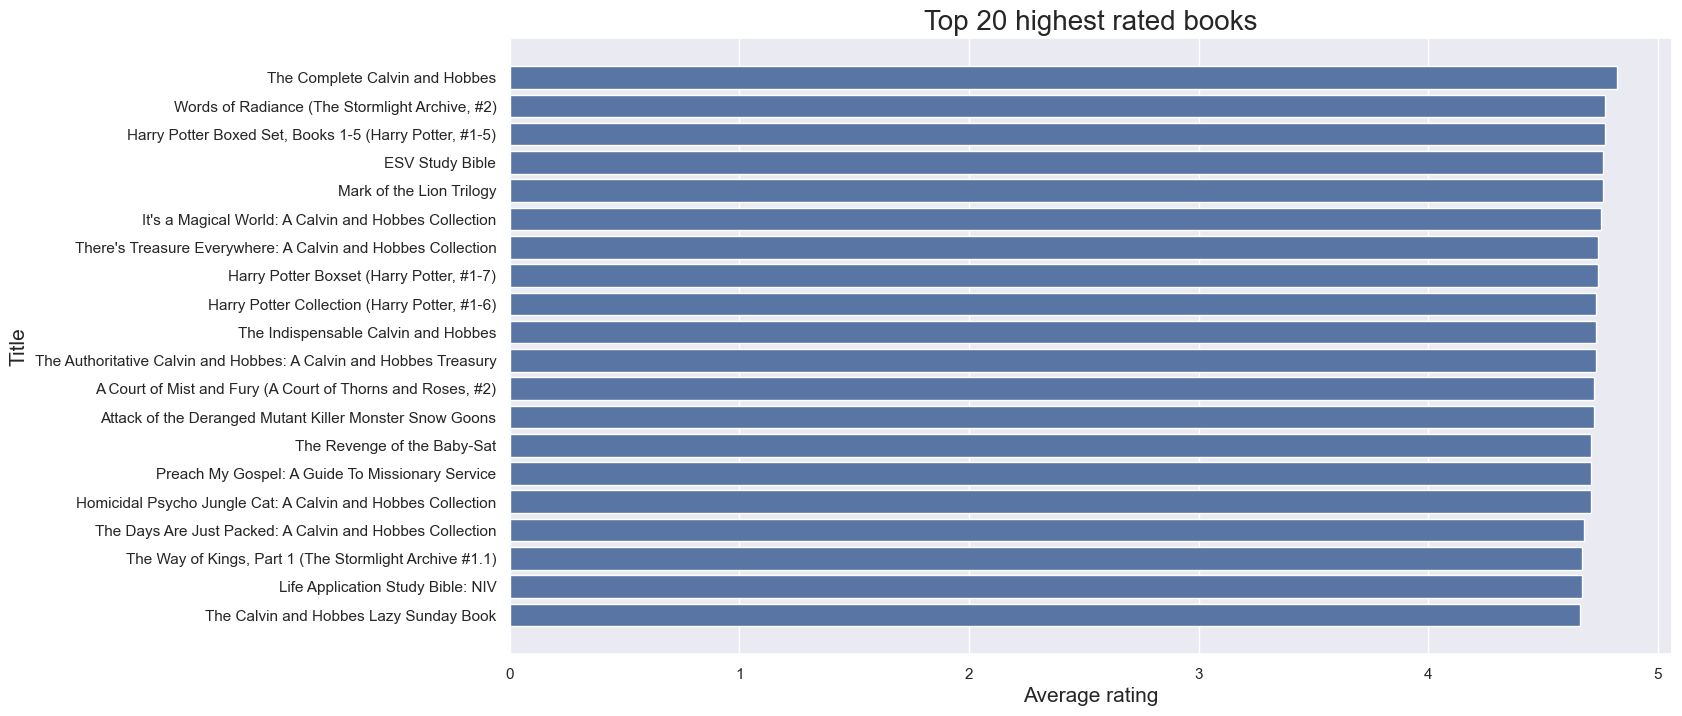

In [22]:
top_rated = books.sort_values('average_rating', ascending=False)
top_rated = top_rated[:20]

plt.figure(figsize = (15,8))
sns.barplot(data = top_rated, y = 'title', x = 'average_rating')
plt.ylabel('Title', fontsize = 15)
plt.xlabel('Average rating', fontsize = 15)
plt.title('Top 20 highest rated books', fontsize = 20)

plt.plot()

### 20 Most popular books 👇 ⭐

[]

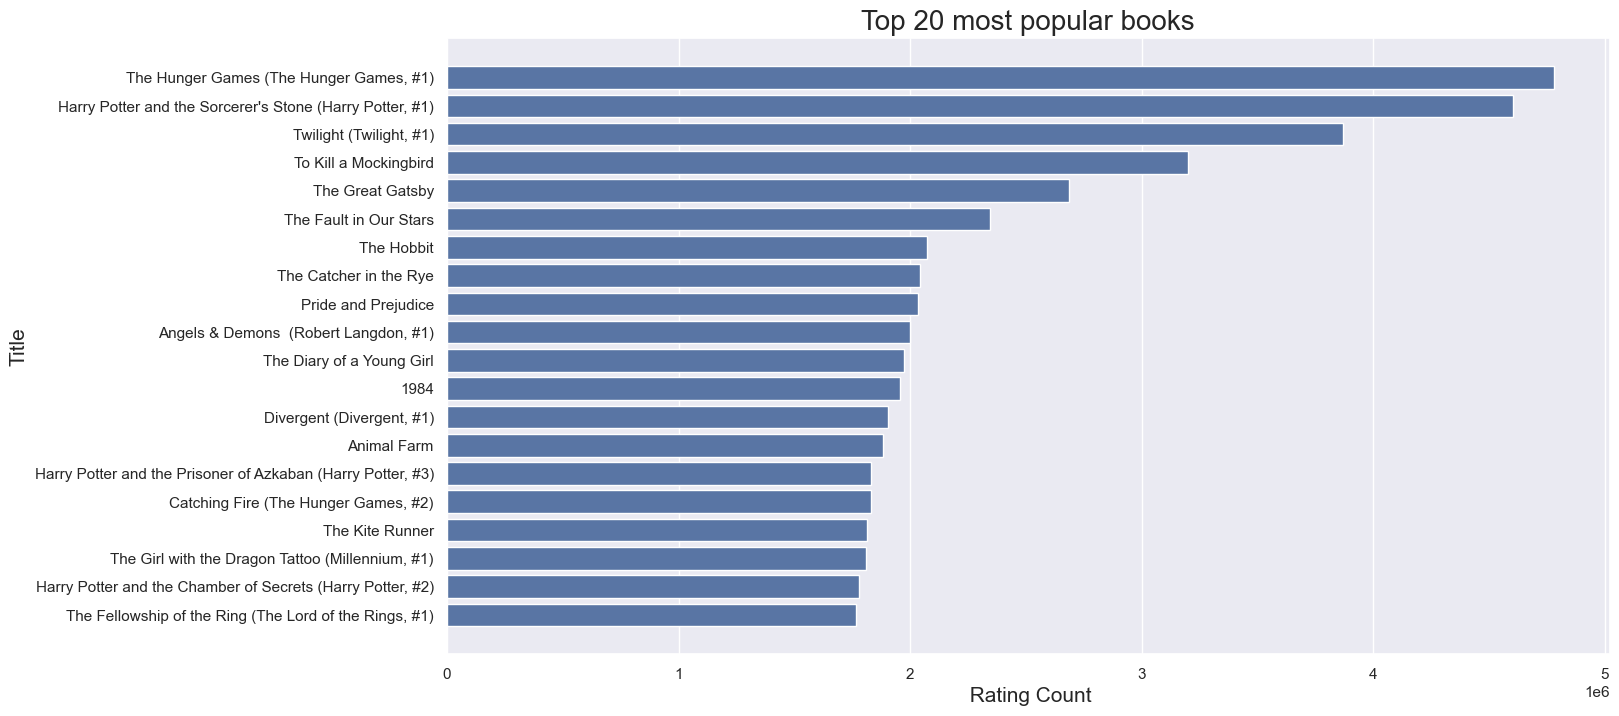

In [23]:
top_popular = books.sort_values('ratings_count', ascending=False)
top_popular = top_popular[:20]

plt.figure(figsize = (15,8))
sns.barplot(data = top_popular, y = 'title', x = 'ratings_count')
plt.ylabel('Title', fontsize = 15)
plt.xlabel(' Rating Count', fontsize = 15)
plt.title('Top 20 most popular books', fontsize = 20)

plt.plot()

### Top Authors 📖✍️

[]

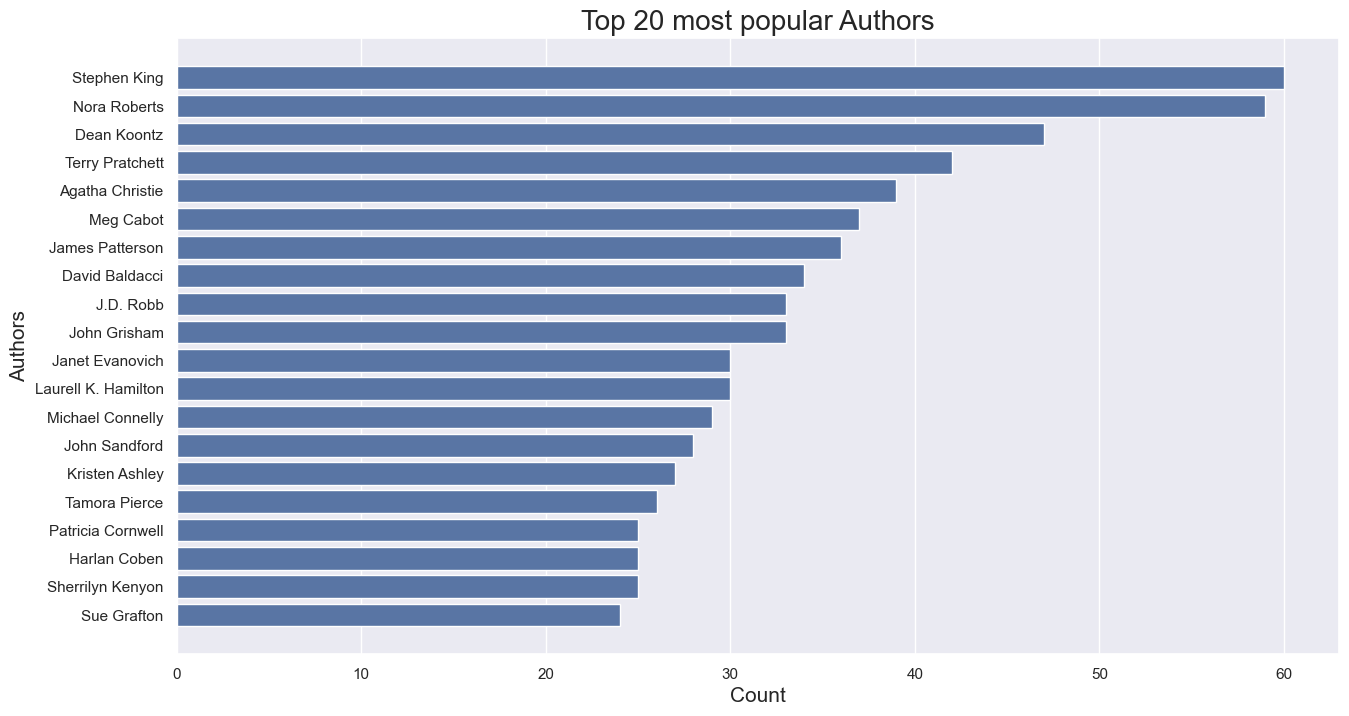

In [24]:
top_author_counts = books['authors'].value_counts().reset_index()
top_author_counts.columns = ['authors', 'count']
top_author_counts = top_author_counts.sort_values('count', ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(data = top_author_counts.head(20), y = 'authors', x = 'count')
plt.ylabel('Authors', fontsize = 15)
plt.xlabel('Count', fontsize = 15)
plt.title('Top 20 most popular Authors', fontsize = 20)

plt.plot()

### Most Ratings ⭐⭐⭐⭐

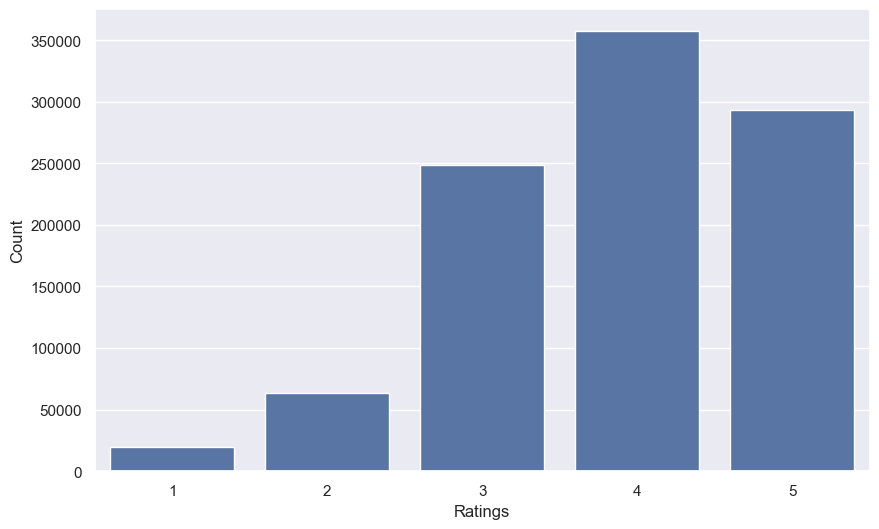

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data = ratings, x = 'rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Most people give a four st⭐r to most books

# 3. Model
## Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [31]:
books = pd.read_csv('C:/Users/kl/Desktop/Novel Recommender/books_cleaned.csv')
ratings = pd.read_csv('C:/Users/kl/Desktop/Novel Recommender/ratings.csv')

We use the rating to train our model based on the ratings and also recommend books to the user from the books dataset

## Splitting the data

In [32]:
inputs = ratings.drop('rating', axis = 1)
targets = ratings['rating']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size =0.2, random_state =42 )

Use the test set for validation purpose only

In [34]:
print('Shape of train inputs set: '+ str(x_train.shape))
print('Shape of train targets set: '+ str(y_train.shape))
print('Shape of test inputs set: ' + str(x_test.shape))
print('Shape of test tagets set: ' + str(y_test.shape))

Shape of train inputs set: (785404, 2)
Shape of train targets set: (785404,)
Shape of test inputs set: (196352, 2)
Shape of test tagets set: (196352,)


## Basic overview of the architecture
The Neural Network architecture we're creating will have two input embedding layers. The first embeding layer accepts the books, and the second users. These two embeddings are trained seperately and the combined together before being passed to a dense layer.
Finally the final output will be used to predict a single rating.

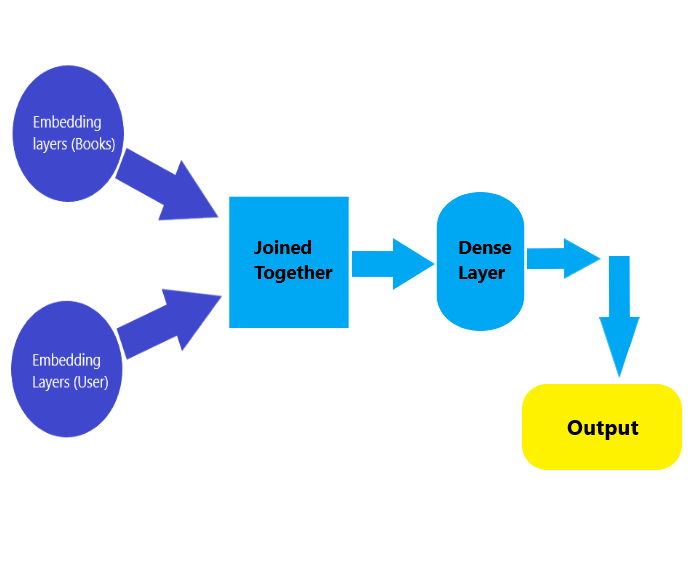

In [35]:
#Taking the no. of unique book_id and user_id from the number of unique items
book_id = ratings.book_id.nunique()
user_id = ratings.user_id.nunique()

In [36]:
print('Total books: ' + str(book_id))
print('Total Users: ' + str(user_id))

Total books: 10000
Total Users: 53424


## Creating the model

In [37]:
from tensorflow.keras.layers import Dense, Flatten, Input, Embedding, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

## Embedding Layers

In [42]:
#Embedding layers for books
books_input = Input(shape = [1]) #List input layer
embedding_layer_books = Embedding(book_id + 1, 20)(books_input)#embedding layer
embedding_output_books = Flatten()(embedding_layer_books)#output layer

#Embedding layers for users
user_input = Input(shape = [1])#list input layer
embedding_layer_users = Embedding(user_id + 1, 20)(user_input)
embedding_output_users = Flatten()(embedding_layer_users)#output layer

We now append the input layers on top of embedding layers. This is an action of functional API. It basically means that the outputs of those input layers is passed on to the embedding layers.

In [43]:
# Concatination and Dense layer
joining_layer = Concatenate()([embedding_output_books, embedding_output_users]) #Joining the outputs of the two embedding layers

hidden_layer = Dense(128, activation='relu')(joining_layer)

output = Dense(1)(hidden_layer)

model = tf.keras.Model([books_input, user_input], output)

## Model Compilation

In [45]:
optimizers = Adam(lr = 0.01)#Using a custom learning rate

model.compile(optimizer=optimizers, loss = 'mean_squared_error')#Using mean squared error as loss function

model.summary()

ValueError: Argument(s) not recognized: {'lr': 0.01}

## Model Training

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    
    x_train, y_train,
    batch_size = 64, #Setting a lower batch size for faster training
    epochs = 15,
    callbacks = [early_stopping],
    validation_data = [x_test, y_test],
    verbose = 1
    
)